<AxesSubplot:xlabel='CO2 emissions', ylabel='Renewable energy %'>

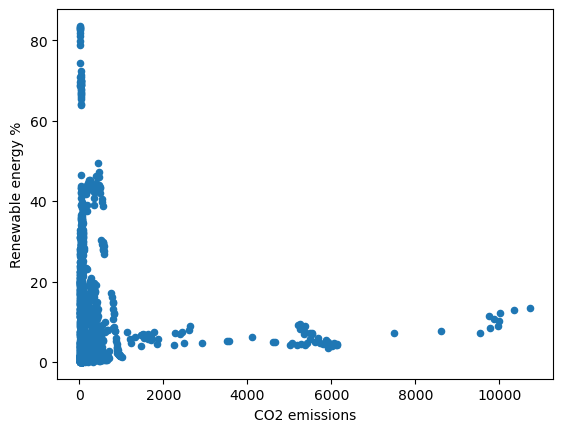

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/annual_co2_emissions.csv"
df_co2 = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/annual_renewable_energy.csv"
df_green_energy = pd.read_csv(url2)

url3 = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/annual_population.csv"
df_population = pd.read_csv(url3, on_bad_lines='skip')
df_population = df_population.loc[:, ['Country name', 'Year', 'Population']]
df_population = df_population.rename(columns={'Country name': 'Entity'})

url4 = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/GDP.csv"
df_GDP = pd.read_csv(url4)

url5 = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/gini_coefficient.csv"
df_gini = pd.read_csv(url5)

url6 = "https://raw.githubusercontent.com/pekpekkis/Data-Management-Group-Project/main/continents.csv"
df_continents = pd.read_csv(url6)
df_continents = df_continents.drop('Year', axis='columns')

df_combined = df_co2.merge(df_green_energy, how='left', on=['Entity', 'Code', 'Year']).merge(df_population, how='left', on=['Entity', 'Year']).merge(df_GDP, how='left', on=['Entity', 'Code', 'Year']).merge(df_gini, how='left', on=['Entity', 'Code', 'Year']).merge(df_continents, how='left', on=['Entity', 'Code'])

df_combined['GDP per capita'] = df_combined['GDP (constant 2015 US$)'] / df_combined['Population']

def income_dummies(row):
    if row['GDP per capita'] < 1036:
        return 1, 0, 0, 0
    elif row['GDP per capita'] >= 1036 and row['GDP per capita'] < 4045:
        return 0, 1, 0, 0
    elif row['GDP per capita'] >= 4045 and row['GDP per capita'] < 12535:
        return 0, 0, 1, 0
    elif row['GDP per capita'] >= 12535:
        return 0, 0, 0, 1
    else:
        return 0, 0, 0, 0

df_combined[['Low income', 'Lower-middle income', 'Upper-middle income', 'High income']] = df_combined.apply(income_dummies, axis=1, result_type='expand')

def geo_dummies(row):
    if row['Continent'] == 'Africa':
        return 1, 0, 0, 0, 0, 0
    elif row['Continent'] == 'Asia':
        return 0, 1, 0, 0, 0, 0
    elif row['Continent'] == 'Europe':
        return 0, 0, 1, 0, 0, 0
    elif row['Continent'] == 'North America':
        return 0, 0, 0, 1, 0, 0
    elif row['Continent'] == 'South America':
        return 0, 0, 0, 0, 1, 0
    else:
        return 0, 0, 0, 0, 0, 1

df_combined[['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']] = df_combined.apply(geo_dummies, axis=1, result_type='expand')

df_combined = df_combined.rename(columns={'Entity': 'Country', 'Annual CO₂ emissions': 'CO2 emissions', 'Renewables (% equivalent primary energy)': 'Renewable energy %', 'GDP (constant 2015 US$)': 'GDP', 'Gini coefficient': 'Gini'})
df_combined.loc[df_combined['Country'] == 'United States', 'Country'] = 'United States of America'
df_combined.loc[df_combined['Country'] == "Cote d'Ivoire", 'Country'] = "Côte d'Ivoire"
df_combined['CO2 emissions'] = df_combined['CO2 emissions'] / 1000000
df_combined = df_combined[df_combined['Code'].notna()]
df_combined = df_combined.drop('Code', axis='columns')
df_combined = df_combined.drop(df_combined[df_combined['Country'] == 'World'].index, axis=0)

df_2020 = df_combined.loc[df_combined.Year == 2020]
df_2020.dropna()

import numpy as np
import os
import matplotlib.pyplot as plt

df_clean = df_combined.dropna()
#df_clean.plot.scatter('CO2 emissions', 'Renewable energy %')

In [212]:
summary_stats = df_clean.describe()
summary_stats = summary_stats.drop(['Year', 'Low income', 'Lower-middle income', 'Upper-middle income', 'High income', 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania'], axis=1)
summary_stats

,CO2 emissions,Renewable energy %,Population,GDP,Gini,GDP per capita,CO2 emissions_log
count,1206.000000,1206.000000,1.206000e+03,1.206000e+03,1206.000000,1206.000000,1206.000000
mean,472.359429,13.436204,7.940781e+07,9.913991e+11,0.352339,21790.495642,4.715670
std,1301.018168,15.460197,2.034676e+08,2.567180e+12,0.081688,21787.496888,1.599727
min,2.968443,0.006965,2.898060e+05,6.099133e+09,0.201866,388.838497,1.088038
25%,42.723239,3.115038,7.314051e+06,8.422615e+10,0.293495,5429.889769,3.754743
50%,88.492850,7.149411,1.804078e+07,2.338836e+11,0.334770,11943.378810,4.482921
75%,341.507130,19.118451,6.420866e+07,7.470774e+11,0.393040,36512.336474,5.833367
max,10740.996000,83.540470,1.421864e+09,1.997453e+13,0.647625,112445.052978,9.281823


In [345]:
df_corr = df_clean.drop(['Year', 'CO2 emissions_log', 'GDP per capita', 'Low income', 'Lower-middle income', 'Upper-middle income', 'High income', 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania'], axis=1)
corr_matrix = df_corr.corr()
corr_matrix

,CO2 emissions,Renewable energy %,Population,GDP,Gini
CO2 emissions,1.000000,-0.124808,0.724105,0.866188,0.135319
Renewable energy %,-0.124808,1.000000,-0.076252,-0.088949,0.142168
Population,0.724105,-0.076252,1.000000,0.453594,0.144761
GDP,0.866188,-0.088949,0.453594,1.000000,0.130421
Gini,0.135319,0.142168,0.144761,0.130421,1.000000


C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_19684\1985591995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CO2 emissions_log'] = np.log(df_clean['CO2 emissions'])


<AxesSubplot:xlabel='CO2 emissions_log', ylabel='Renewable energy %'>

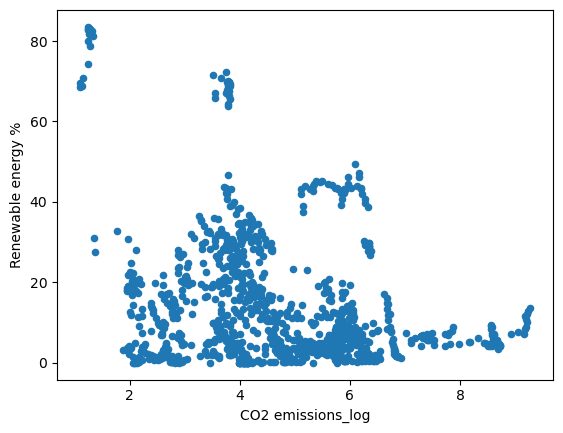

In [18]:
df_clean['CO2 emissions_log'] = np.log(df_clean['CO2 emissions'])

In [352]:
features= df_clean.drop(['Country', 'Continent', 'CO2 emissions', 'CO2 emissions_log', 'Year', 'GDP per capita', 'Europe', 'High income'], axis=1)
y_full= df_clean['CO2 emissions_log']

n_samples = features.shape[0]
n_features = features.shape[1]
print(n_samples, n_features)

1206 12


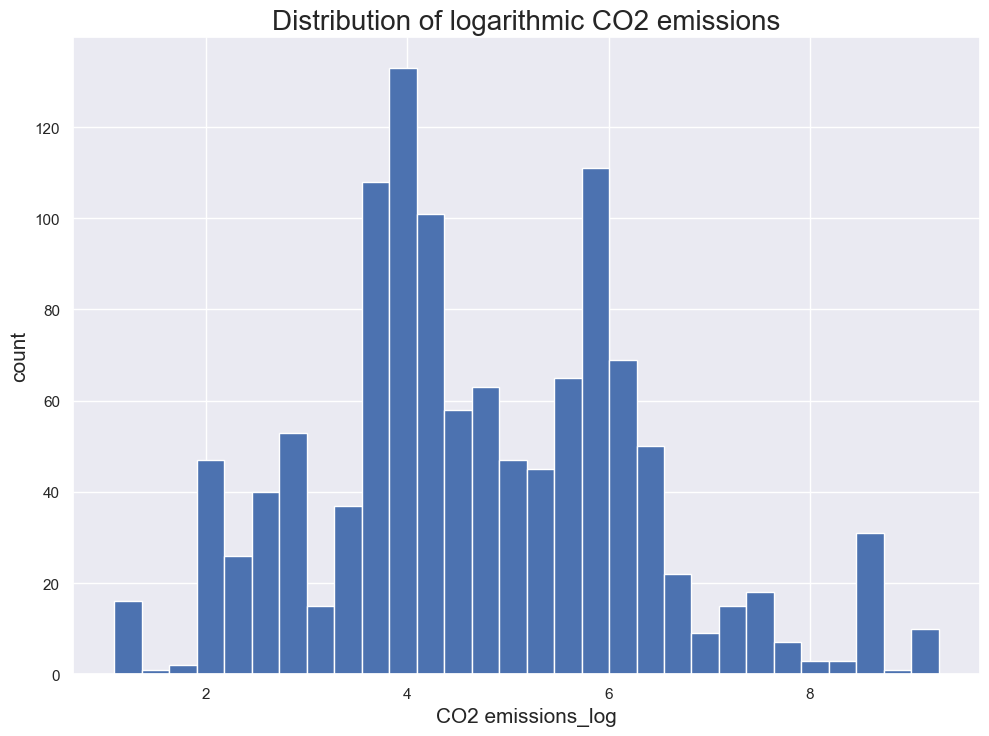

In [353]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("CO2 emissions_log", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of logarithmic CO2 emissions', size=20)
plt.show()

In [292]:
import numpy as np

threshold = 1  # Adjust the threshold as needed

# Calculate the z-scores for the 'CO2 emissions_log' column
z_scores = np.abs((df_clean['CO2 emissions_log'] - df_clean['CO2 emissions_log'].mean()) / df_clean['CO2 emissions_log'].std())

# Identify outliers based on the threshold
outliers = df_clean[z_scores > threshold]

# Drop the outliers from the DataFrame
df_clean_kokeilu3 = df_clean[z_scores <= threshold]

# Reset the index of the DataFrame
df_clean_kokeilu3.reset_index(drop=True, inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the dropped outliers
print("Dropped outliers:")
print(len(outliers))
print(outliers)
# Print the updated DataFrame after dropping outliers


Dropped outliers:
360
                        Country  Year  CO2 emissions  Renewable energy %  \
3135                 Bangladesh  1983       8.188282            4.870659   
3140                 Bangladesh  1988      13.478441            3.090864   
3143                 Bangladesh  1991      14.741983            3.477609   
3147                 Bangladesh  1995      21.041714            1.026995   
4359                     Brazil  2014     557.901000           38.852745   
5535                     Canada  2000     566.690400           29.767817   
5539                     Canada  2004     579.592060           26.827923   
5542                     Canada  2007     593.515800           27.694315   
5545                     Canada  2010     556.560600           27.789688   
5547                     Canada  2012     568.223170           28.976913   
5548                     Canada  2013     572.613300           28.941828   
5549                     Canada  2014     569.839700           28.

In [313]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 678 to 30778
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Renewable energy %   1206 non-null   float64
 1   Population           1206 non-null   float64
 2   GDP                  1206 non-null   float64
 3   Gini                 1206 non-null   float64
 4   Low income           1206 non-null   int64  
 5   Lower-middle income  1206 non-null   int64  
 6   Upper-middle income  1206 non-null   int64  
 7   Africa               1206 non-null   int64  
 8   Asia                 1206 non-null   int64  
 9   North America        1206 non-null   int64  
 10  South America        1206 non-null   int64  
 11  Oceania              1206 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 154.8 KB


In [354]:
X_full = features
X_full

,Renewable energy %,Population,GDP,Gini,Low income,Lower-middle income,Upper-middle income,Africa,Asia,North America,South America,Oceania
678,0.177174,2.424302e+07,7.646743e+10,0.401949,0,1,0,1,0,0,0,0
685,0.182248,2.847802e+07,8.150720e+10,0.353301,0,1,0,1,0,0,0,0
701,0.235260,3.654355e+07,1.450655e+11,0.276157,0,1,0,1,0,0,0,0
2522,4.930355,1.493006e+07,4.674850e+11,0.313258,0,0,0,0,0,0,0,1
2526,4.863155,1.578568e+07,5.199374e+11,0.324977,0,0,0,0,0,0,0,1
2530,4.419953,1.679659e+07,6.092028e+11,0.331538,0,0,0,0,0,0,0,1
2536,4.239725,1.800300e+07,7.088410e+11,0.325820,0,0,0,0,0,0,0,1
2542,3.870762,1.924815e+07,8.903728e+11,0.334648,0,0,0,0,0,0,0,1
2544,4.014969,1.969900e+07,9.549222e+11,0.335005,0,0,0,0,0,0,0,1
2545,4.036561,1.992506e+07,9.950810e+11,0.330574,0,0,0,0,0,0,0,1


In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (964, 12) (964,)
test data (242, 12) (242,)


In [356]:
numeric_columns=list(X_train.select_dtypes('float64').columns)
dummy_columns=list(X_train.select_dtypes('int64').columns)
categorical_columns = list(X_train.select_dtypes('int64').columns)

In [357]:
categorical_columns_cleaned = [col for col in categorical_columns if col not in dummy_columns]

In [358]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, dummy_columns)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [359]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [362]:
X_train_num=X_train[numeric_columns + categorical_columns]
lin_reg.fit(X_train_num, y_train)

LinearRegression()

In [363]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_num, y_train), 2)))
r_squared_1 = lin_reg.score(X_train_num, y_train)

R-squared for training dataset:0.54


In [334]:
lin_reg.fit(X_train_preprocessed, y_train)
print("R-squared for training dataset & preprocessed features:{}".
      format(np.round(lin_reg.score(X_train_preprocessed, y_train), 2)))
r_squared_2 = lin_reg.score(X_train_preprocessed, y_train)

R-squared for training dataset & preprocessed features:0.54


In [323]:
lin_reg.coef_

array([-0.32906724,  0.51901083,  0.61160993,  0.09374464, -1.24753993,
       -0.24394191,  0.11025907,  0.35685259,  0.4405506 ,  0.51912016,
        0.07457772,  1.24281135])

In [324]:
print('The coefficients of the features from the linear model:')
print(dict(zip(numeric_columns + categorical_columns, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'Renewable energy %': -0.33, 'Population': 0.52, 'GDP': 0.61, 'Gini': 0.09, 'Low income': -1.25, 'Lower-middle income': -0.24, 'Upper-middle income': 0.11, 'Africa': 0.36, 'Asia': 0.44, 'North America': 0.52, 'South America': 0.07, 'Oceania': 1.24}


In [325]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_preprocessed, y_train)
y_train_pred = lin_reg.predict(X_train_preprocessed)

In [342]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse_1 = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse_1)

RMSE: 1.067539779471966


In [341]:
#1. Out-of-sample performance = test RMSE
y_test_pred = lin_reg.predict(X_test_preprocessed)    
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse_1 = np.sqrt(test_mse)
print("RMSE: %s" % test_rmse_1) 

RMSE: 1.1260339081494632


In [364]:
import statsmodels.api as sm

# Create X and y from the dataframe
X = df_clean[["Renewable energy %", "Population", "GDP", "Gini",
              "Low income", "Lower-middle income", "Upper-middle income",
              "Africa", "Asia", "North America", "South America", "Oceania"]]
y = df_clean["CO2 emissions_log"]

# Fit the linear regression model using sklearn
#lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Add constant column to X for intercept term
X_with_constant = sm.add_constant(X)

# Fit the OLS model using statsmodels
ols_model = sm.OLS(y, X_with_constant)
results = ols_model.fit()

# Get the coefficients from sklearn's linear regression model
coefficients = lin_reg.coef_

# Calculate the p-values using statsmodels
p_values = results.pvalues[1:]  # Exclude the intercept

# Associate the coefficients with their corresponding p-values
coefficients_with_pvalues = pd.DataFrame({"Coefficient": coefficients, "P-value": p_values}, index=X.columns)

In [331]:
coefficients_with_pvalues

,Coefficient,P-value
Renewable energy %,-2.211854e-02,5.667758e-21
Population,2.661313e-09,3.036068e-36
GDP,2.290784e-13,9.298412e-32
Gini,1.332153e+00,4.509464e-02
Low income,-1.045215e+00,7.071369e-05
Lower-middle income,-2.723206e-01,1.936804e-02
Upper-middle income,5.031602e-02,5.598304e-01
Africa,3.776562e-01,1.261363e-01
Asia,4.315740e-01,8.211862e-05
North America,7.099266e-01,2.718139e-04


In [343]:
goodness_of_fit_1 = pd.DataFrame({"Goodness of fit":[r_squared_1,
                                                     r_squared_2,
                                                     train_rmse_1,
                                                     test_rmse_1]}, index=["R-squared for training dataset:",
                                                                         "R-squared for training dataset & preprocessed features",
                                                                         "Trainingset RMSE",
                                                                        "Testset RMSE"])
goodness_of_fit_1

,Goodness of fit
R-squared for training dataset:,0.533374
R-squared for training dataset & preprocessed features,0.536577
Trainingset RMSE,1.067540
Testset RMSE,1.126034
